In [51]:
# 업비트 테스팅 자료가 저장되어야 정상적으로 수행됩니다!

# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import collections

# google drive 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# 환경변수 세팅

# predict 파일 날짜
TEST_DATE = "20240421"

# 그래프 그릴 토큰 심볼들
TARGET_SYMBOLS = ["BTC", "ETH", "SOL"]

In [20]:
# 코인 시세 자료 가져오기
path = "/content/drive/My Drive/Colab Notebooks/Upbit_test_Folder/"
data_path = path + 'coin_data.csv'
coin_prices = pd.read_csv(data_path, parse_dates=['date'])
print(coin_prices[(coin_prices.date == "2024-04-19") & (coin_prices.name == "BTC")].close)

325    93390000.0
Name: close, dtype: float64


In [7]:
# 백테스팅 결과 가져오기
data_path = path + TEST_DATE +'_predict.csv'
expects = pd.read_csv(data_path, parse_dates=['date'])
expects.head()

,coin,date,preds
0,BTC,2024-04-18,99.908628
1,BTC,2024-04-19,99.990548
2,BTC,2024-04-20,100.065636
3,BTC,2024-04-21,99.911714
4,ETH,2024-04-18,99.999790


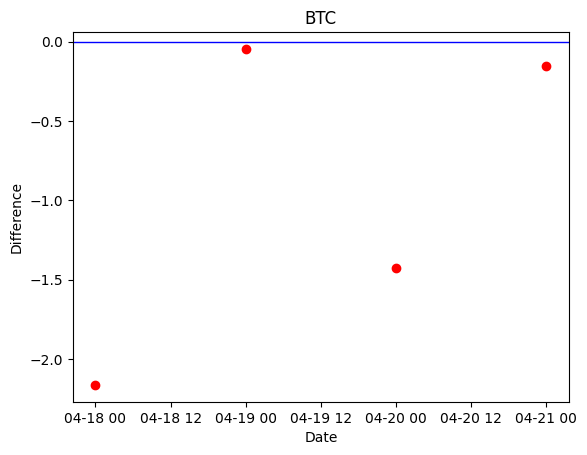

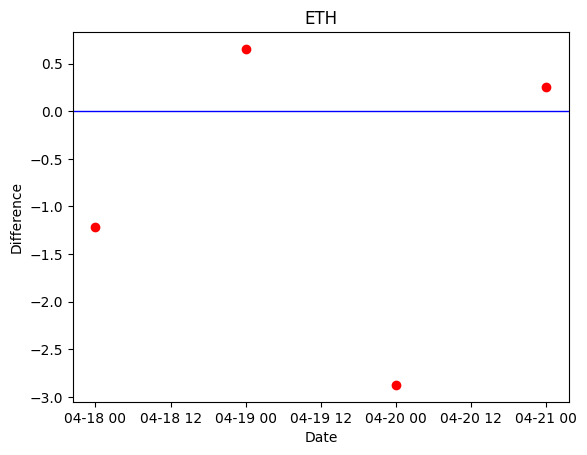

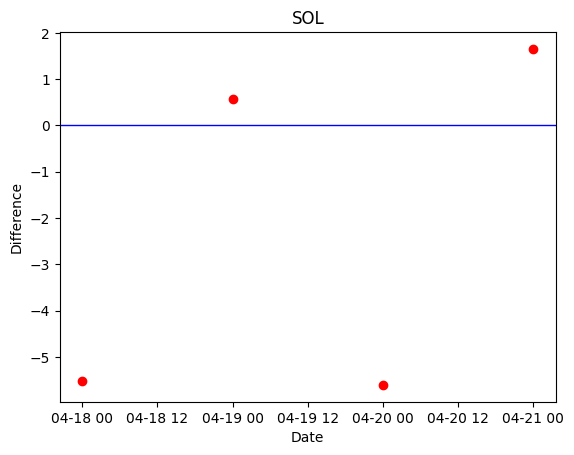

In [67]:
# 그래프 그리기

expect_diffs = collections.defaultdict(lambda: collections.defaultdict(list))

for idx, expect in expects.iterrows():
  target_date = expect.date
  target_token = expect.coin
  target_yesterday_date = expect.date - timedelta(days=1)

  # 예상가격 = 예측 치 * 어제 가격
  expect_price = coin_prices[(coin_prices.date == target_yesterday_date) & (coin_prices.name == target_token)].close.mul(expect.preds * 0.01)

  # 실제가격 = 해당 expect 날짜의 코인 데이터
  real_price = coin_prices[(coin_prices.date == target_date) & (coin_prices.name == target_token)].close

  expect_diffs[target_token]['diffs'].append(expect_price.values[0] / real_price.values[0] * 100 - 100)
  expect_diffs[target_token]['dates'].append(target_date)

for symbol in TARGET_SYMBOLS:
  plt.plot(expect_diffs[symbol]['dates'], expect_diffs[symbol]['diffs'], 'ro')
  plt.title(symbol)
  plt.xlabel("Date")
  plt.ylabel("Difference")
  plt.axhline(y=0, color='b', linewidth=1)
  plt.show()